# Fares & Stef

## First part : statistical analysis to confirm our model and its interpretation

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [5]:
#1- the average age of men and women who bought a product bool =1
df = pd.read_csv("social.csv")
medium_salary = df.query('Purchased == 1')

med_age = np.mean(medium_salary["Age"])
print('Medium age for women and men that bought the product: ',med_age )

Medium age for women and men that bought the product:  46.39160839160839


In [6]:
data = df.query('Purchased == 1') #we will reduce the table to have the data containing the people who purchased

C:\Users\Stefa\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


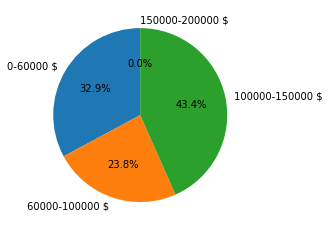

In [7]:
#2- Most impulsive type of income among men and women who bought a product #bool = 1

first_range = data.query('EstimatedSalary>0 & EstimatedSalary<=60000')
r1=np.array([first_range['EstimatedSalary'].shape])

second_range = data.query('EstimatedSalary>60000 & EstimatedSalary<=100000')
r2=np.array([second_range['EstimatedSalary'].shape])

third_range = data.query('EstimatedSalary>100000 & EstimatedSalary<=150000')
r3=np.array([third_range['EstimatedSalary'].shape])

fourth_range = data.query('EstimatedSalary>150000 & EstimatedSalary<=200000')
r4=np.array([fourth_range['EstimatedSalary'].shape])



name = ['0-60000 $', '60000-100000 $','100000-150000 $','150000-200000 $']
data_name = [r1, r2, r3, r4]
#explode=(0, 0, 0, 0)
plt.pie(data_name, explode=None, labels=name, autopct='%1.1f%%', startangle=90, shadow=False)
#plt.axis('equal')
plt.show()

In [8]:
#3- gender of the people who have purchased the most products #bool = 1
data = df.query('Purchased == 1')

men = data[data['Gender'] == 'Male']
men_count= men['Gender'].count()
women = data[(data['Gender'] == 'Female')]
women_count = women['Gender'].count()
print('Men who made a purchased',men_count, 'and ' 'Women who made a purchased',women_count)


Men who made a purchased 66 and Women who made a purchased 77


In [10]:
#4-  average salary of men and women who bought a product #bool = 1
medium_salary = df.query('Purchased == 1')
med_salary = medium_salary["EstimatedSalary"].mean()

print('Medium salary for women and men that bought the product: ',med_salary )

Medium salary for women and men that bought the product:  86272.72727272728


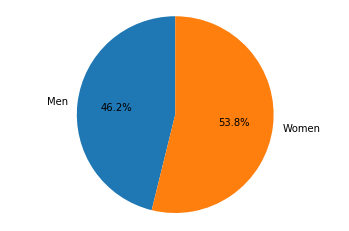

In [9]:
#diagram to see the proportion of men and women who have purchased a product
#Here, the women purchased the most
name=['Men','Women']
data = [men_count, women_count]


plt.pie(data, explode=None, labels=name, autopct='%1.1f%%', startangle=90, shadow=False)
plt.axis('equal')
plt.show()

## Second part : clustering and linear regression

In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [15]:
data = pd.read_csv("social.csv")

In [13]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
data.drop(['User ID'], axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [14]:
#total rows and colums in the dataset
data.shape

(400, 5)

In [29]:
data.info() # there are no missing values as all the columns has 400 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [30]:
#Missing values computation none
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

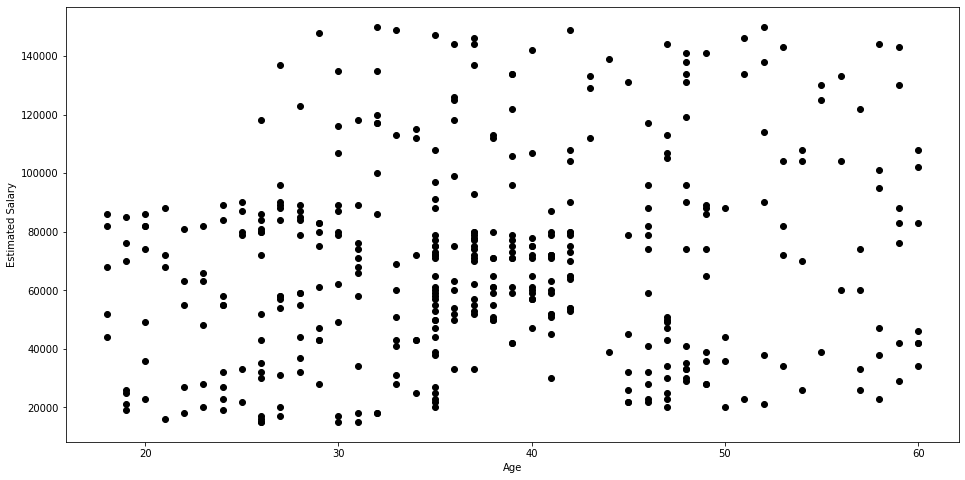

In [16]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Age'],
    data['EstimatedSalary'],
    c='black'
)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

In [17]:
X = data['Age'].values.reshape(-1,1)
y = data['EstimatedSalary'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.4} + {:.4}X".format(reg.intercept_[0], reg.coef_[0][0]))


The linear model is: Y = 5.073e+04 + 504.9X


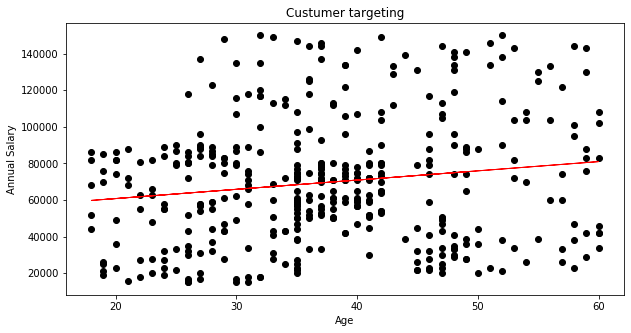

In [18]:
#Linear regression to predict the evolution of salaries of custumers
#and which one will earn more than the average and so be more likely to purchased
predictions = reg.predict(X)
plt.figure(figsize=(10, 5))
plt.scatter(data['Age'],data['EstimatedSalary'],c='black')
plt.plot(data['Age'],predictions,c='red',linewidth=1)
plt.title("Custumer targeting")
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.show()

In [19]:
y = data['Age']
X = data['EstimatedSalary']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              1427.
Date:                Sat, 01 Feb 2020   Prob (F-statistic):                   7.78e-134
Time:                        10:08:01   Log-Likelihood:                         -1729.7
No. Observations:                 400   AIC:                                      3461.
Df Residuals:                     399   BIC:                                      3465.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [20]:
# Feature selection for the model
#Considering only 2 features (Annual income and Age)
X= data.iloc[:, [2,3]].values



In [62]:
#Building the Model for clustering
#KMeans Algorithm to decide the optimum cluster number

from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 12
#you can judge the number of clusters by doing the average
###Static code to get the maximum number of clusters

for i in range(1,12):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia_ is the formula used to segregate the data points into clusters


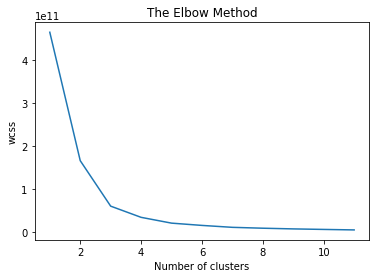

In [63]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [64]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#we'll see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" whereas for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we'll use this model in production is depends on what tool we are using.
#This use case is very common and it is used in the credit card industry and retail for customer segmentation.

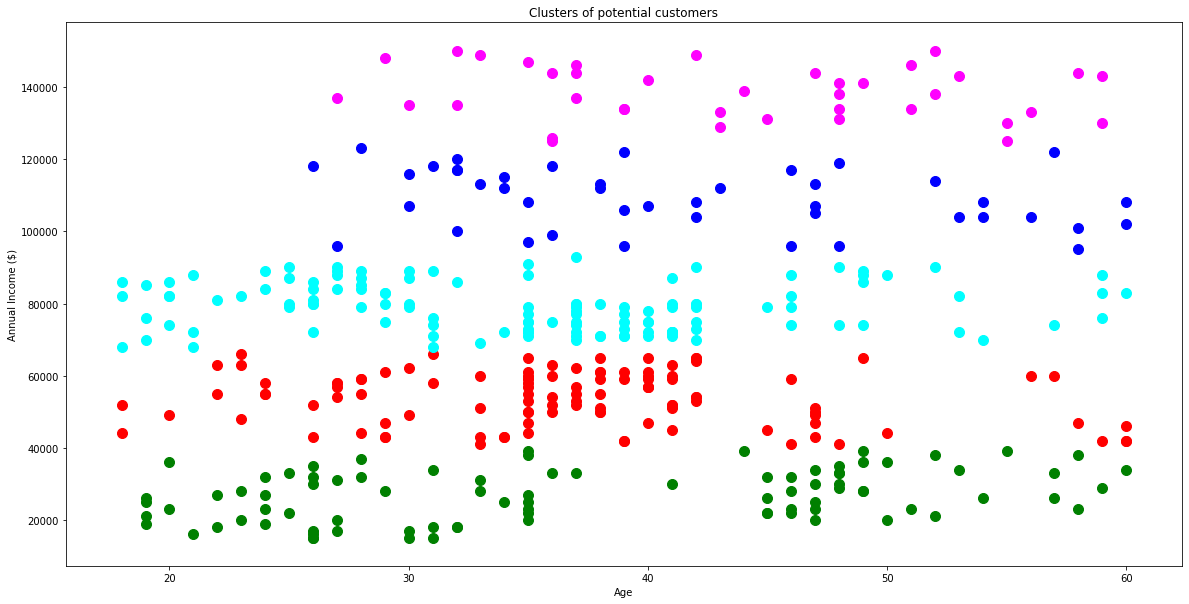

In [65]:
#Visualizing all the clusters
#Resizing the plot
plt.figure(figsize=(20, 10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of potential customers')

plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

plt.show()

In [68]:
buyers = data.query('Purchased == 1')
buyers.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1


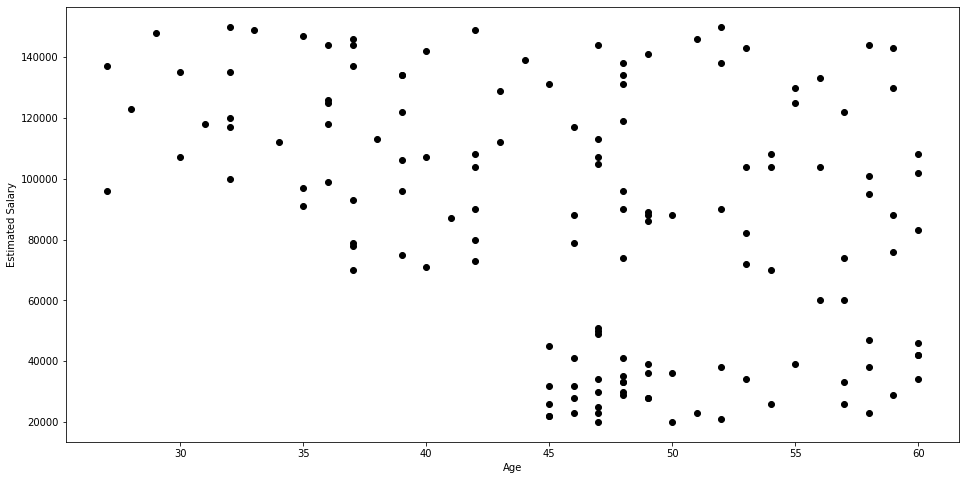

In [69]:
plt.figure(figsize=(16, 8))
plt.scatter(
    buyers['Age'],
    buyers['EstimatedSalary'],
    c='black'
)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

In [70]:
X = buyers['Age'].values.reshape(-1,1)
y = buyers['EstimatedSalary'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.4} + {:.4}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 1.699e+05 + -1.802e+03X


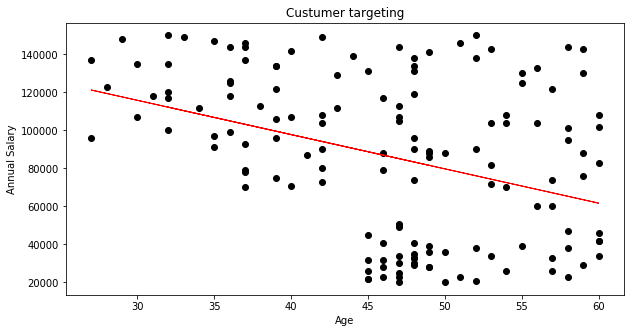

In [71]:
#Linear regression to predict the evolution of salaries of custumers
#and which one will earn more than the average and so be more likely to purchased
predictions = reg.predict(X)
plt.figure(figsize=(10, 5))
plt.scatter(buyers['Age'],buyers['EstimatedSalary'],c='black')
plt.plot(buyers['Age'],predictions,c='red',linewidth=1)
plt.title("Custumer targeting")
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.show()

In [78]:
y = buyers['Age']
X = buyers['EstimatedSalary']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              386.3
Date:                Fri, 31 Jan 2020   Prob (F-statistic):                    2.39e-42
Time:                        00:21:22   Log-Likelihood:                         -660.08
No. Observations:                 143   AIC:                                      1322.
Df Residuals:                     142   BIC:                                      1325.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [79]:
Y= buyers.iloc[:, [2,3]].values

In [74]:
from sklearn.cluster import KMeans
wcss=[]



for i in range(1,12):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia_ is the formula used to segregate the data points into clusters

In [75]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(Y)

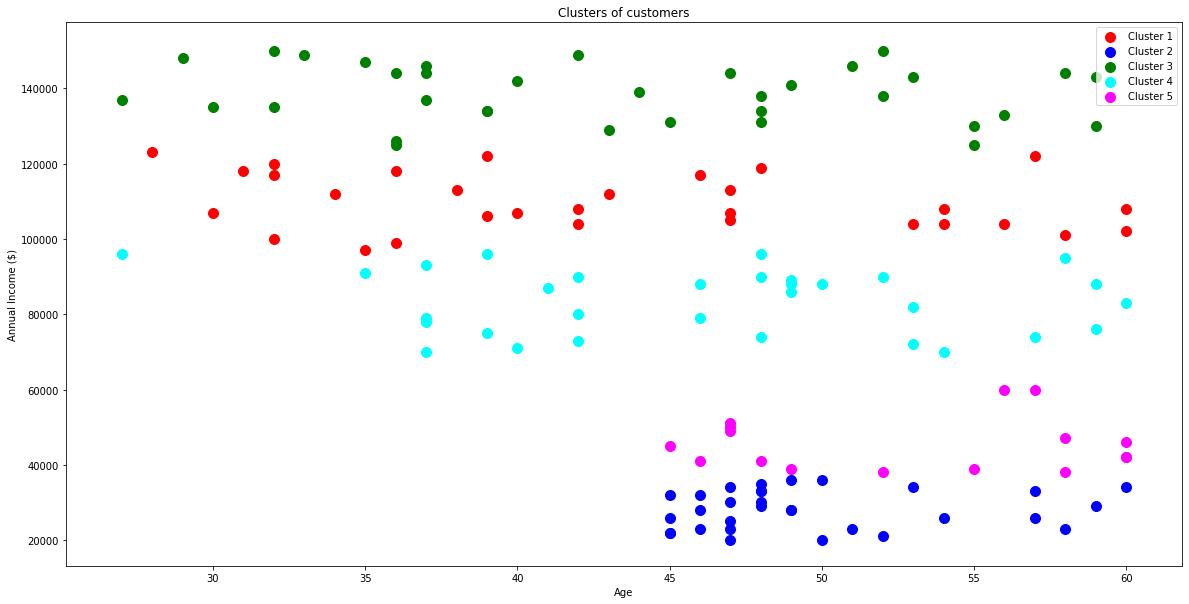

In [90]:
plt.figure(figsize=(20, 10))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Y[y_kmeans == 4, 0], Y[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')

plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.legend()
plt.show()

### Model Interpretation 


In [89]:
#Just to confirm our Model Interpretation: Cluster 3 (>60k & <90k) is the optimal one independant of the age
PP0=(Y[y_kmeans == 0, 1])
PP1=(Y[y_kmeans == 1, 1])
PP2=(Y[y_kmeans == 2, 1])
PP3=(Y[y_kmeans == 3, 1])
PP4=(Y[y_kmeans == 4, 1])
PP_count0=np.count_nonzero(PP0)
PP_count1=np.count_nonzero(PP1)
PP_count2=np.count_nonzero(PP2) #Cluster 3
PP_count3=np.count_nonzero(PP3)
PP_count4=np.count_nonzero(PP4)
print (PP_count0,PP_count1,PP_count2,PP_count3,PP_count4)

30 31 35 31 16


In [ ]:
Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1],